<a href="https://colab.research.google.com/github/borisenko-ru/miscellaneous/blob/main/un_ga_speech_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2

import PyPDF2
import re
import string
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


In [3]:
def word_clouds(country_notes, top_words, exclude_words):
  pdffileobj = open(country_notes+'.pdf','rb')
  pdfreader = PyPDF2.PdfFileReader(pdffileobj)
 
  x = pdfreader.numPages

  for i in range(x):
    pageobj = pdfreader.getPage(i)
    text = pageobj.extractText()
    file1 = open(country_notes+'.txt','a')
    file1.writelines(text)

  document_text = open(country_notes+'.txt', 'r')
  text_string = document_text.read().lower()
  match_pattern = re.findall(r'\b[a-zA-Zа-яА-Я]{3,15}\b', text_string)

  return ' '.join(match_pattern)

def word_freq(country_notes, top_words, exclude_words, percent_speech_threshold):

  # WordCloud plot
  text = word_clouds(country_notes, None, None)

  wordcloud = WordCloud(width=500, height=500).generate(text)

  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.margins(x=0, y=0)
  plt.show()

  # Table
  pdffileobj = open(country_notes+'.pdf','rb')
  pdfreader = PyPDF2.PdfFileReader(pdffileobj)
 
  x = pdfreader.numPages

  for i in range(x):
    pageobj = pdfreader.getPage(i)
    text = pageobj.extractText()
    file1 = open(country_notes+'.txt','a')
    file1.writelines(text)

  frequency = {}
  document_text = open(country_notes+'.txt', 'r')
  text_string = document_text.read().lower()

  match_pattern = re.findall(r'\b[a-zA-Zа-яА-Я]{3,15}\b', text_string)
 
  for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
  frequency_list = frequency.keys()

  data = dict()
  for words in frequency_list:
    data[words] = frequency[words]

  freq = pd.DataFrame.from_dict(data, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
  freq['%_speech'] = freq['frequency'] / freq['frequency'].sum() * 100
  freq.reset_index(inplace=True)
  freq = freq[(~freq['index'].isin(exclude_words)) & (freq['%_speech'] >= percent_speech_threshold)]

  return freq.head(top_words)


In [4]:
exclude_words_en = ['can', 'their', 'every', 'more', 'the', 'and', 'that', 'for', 'with', 'this', 'are', 'will', 'not', 'have', 'who', 'but', 'only', 'what', 'which', 'should', 'from', 'there', 'our', 'all', 'you', 'has', 'its', 'after', 'they', 'was']
exclude_words_ru = ['они', 'что', 'как', 'для', 'том', 'именно', 'которые','также','уже','чтобы', 'этот', 'этом', 'этой', 'это','его', 'так', 'когда']
percent_speech_threshold = 0.4


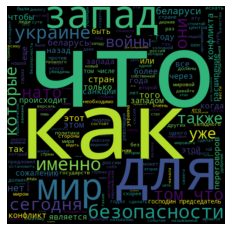

,index,frequency,%_speech
4,запад,22,0.730654
5,безопасности,21,0.697443
6,мир,20,0.664231
8,украине,18,0.597808
9,сегодня,17,0.564596
11,нато,14,0.464962


In [5]:
word_freq('un_ga_by', 20, exclude_words=exclude_words_ru, percent_speech_threshold=percent_speech_threshold)


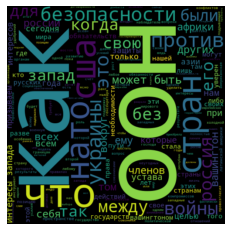

,index,frequency,%_speech
0,оон,41,1.130411
3,сша,21,0.578991
4,нато,19,0.523849
5,стран,18,0.496278
6,против,16,0.441136
7,украины,16,0.441136


In [6]:
word_freq('un_ga_ru', 20, exclude_words=exclude_words_ru, percent_speech_threshold=percent_speech_threshold)


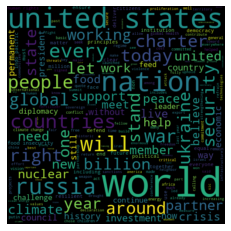

,index,frequency,%_speech
4,united,80,1.342282
5,world,76,1.275168
7,states,66,1.107383
10,nations,38,0.637584
11,russia,38,0.637584
19,global,30,0.503356
21,countries,30,0.503356
22,rights,26,0.436242
23,food,26,0.436242
24,war,26,0.436242


In [7]:
word_freq('un_ga_us', 20, exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)


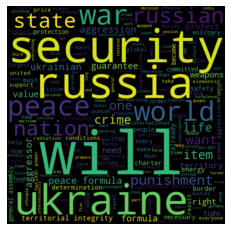

,index,frequency,%_speech
5,peace,59,1.311986
8,russia,43,0.956193
10,formula,39,0.867245
12,security,38,0.845008
14,war,35,0.778297
17,world,33,0.733823
19,ukraine,32,0.711586
20,russian,32,0.711586
21,against,30,0.667111
25,one,28,0.622637


In [8]:
word_freq('un_ga_ua', 30, exclude_words=exclude_words_en, percent_speech_threshold=percent_speech_threshold)
